# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhammad Muthi' Nuritzan
- **Email:** muhammaditzan3@gmail.com
- **ID Dicoding:** nuritzan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan dari waktu ke waktu?
- Produk apa yang paling banyak terjual dan menghasilkan revenue terbesar?
- Daerah mana yang paling banyak tingkat penjualannya dan menghasilkan revenue terbesar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# tabel orders_df
orders_df = pd.read_csv("orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
# tabel order_items_df
order_items_df = pd.read_csv("order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
# tabel customers_df
customers_df = pd.read_csv("customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# tabel products_df
products_df = pd.read_csv("products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Tabel orders_df merupakan tabel utama pada dataset E-Commerce Public Dataset yang berisi informasi umum dari penjualan
- Adanya relasi antar tabel yang dapat menghubungkan antara tabel orders_df, order_items_df, products_df, dan customers_df

In [6]:
# Tabel referensi product_category_name_translation
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

#### Tabel orders_df

In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
# cek missing value
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Missing value pada kolom order_approved_at bisa terjadi jika status_order dibatalkan sehingga tidak adanya pengiriman barang. Selain itu, kolom order_delivered_carrier_date dan order_delivered_customer_date bisa memiliki missing value dikarenakan barang belum selesai dikirimkan dan status order belum selesai.

In [9]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
orders_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Tabel order_items_df

In [11]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


#### Tabel customers_df

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### Tabel products_df

In [17]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Terdapat missing value

In [19]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
1. orders_df
    - Kolom order_approved_at memiliki 160 missing value, order_delivered_carrier_date memiliki 1783 missing value, dan order_delivered_customer_date memiliki 2965 missing value.
    - Kolom order_purchase_timestamp, order_approved_at, order_delivery_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date masih bertipe object.
2. order_items_df
    - Kolom shipping_limit_date masih bertipe object.
3. customers_df
    - Data sudah baik.
4. products_df
    - Kolom product_category_name, product_name_length, product_description_length, product_photos_qty masing-masing memiliki 610 missing value. Lalu, kolom product_weight_g, product_lenghth_cm, product_height_cm, dan product_width_cm masing-masing memiliki 2 missing value.

### Cleaning Data

#### Tabel orders_df

Akan diambil kolom order_id, customer_id, order_status, order_purchase_timestamp, order_delivered_customer_date, dan order_estimated_delivery_date berdasarkan kebutuhan pertanyaan bisnis di atas. Lalu, akan difilter untuk kondisi order_status bernilai "delivered". Karena penjualan yang terhitung mendapatkan revenue adalah penjualan dengan status transaksi "delivered".

In [21]:
orders = orders_df[["order_id", "customer_id", "order_status", "order_purchase_timestamp", "order_delivered_customer_date", "order_estimated_delivery_date"]]
orders = orders[orders["order_status"] == "delivered"]

In [22]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15 00:00:00


In [23]:
# cek apakah ada missing value pada kolom order_delivered_customer_date
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [24]:
# melihat data order_delivered_customer_date yang kosong
orders[orders["order_delivered_customer_date"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,NaN,2018-07-19 00:00:00


Dikarenakan seharusnya status order "delivered" juga memiliki nilai order_delivered_customer_date. Maka, akan dihapus baris yang memiliki missing value pada kolom order_delivered_customer_date.

In [25]:
# menghapus missing value
orders = orders.dropna(subset=["order_delivered_customer_date"])

In [26]:
# cek missing value
orders.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [27]:
# cek tipe data
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96470 non-null  object
 1   customer_id                    96470 non-null  object
 2   order_status                   96470 non-null  object
 3   order_purchase_timestamp       96470 non-null  object
 4   order_delivered_customer_date  96470 non-null  object
 5   order_estimated_delivery_date  96470 non-null  object
dtypes: object(6)
memory usage: 5.2+ MB


In [28]:
# mengganti tipe data pada kolom order_purchase_timestamp, order_delivered_customer_date, dan order_estimated_delivery_date menjadi datetime
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])

/tmp/ipython-input-54486/2675386409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
/tmp/ipython-input-54486/2675386409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])
/tmp/ipython-input-54486/2675386409.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_delivered_customer_date  96470 non-null  datetime64[ns]
 5   order_estimated_delivery_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 5.2+ MB


#### Tabel order_items_df

Dikarenakan kolom seller_id dan shipping_limit_date tidak diperlukan di analisis data ini, maka akan dihapus kolom tersebut.

In [30]:
# menghapus kolom seller_id dan shipping_limit_date
order_items = order_items_df.drop(columns=["seller_id", "shipping_limit_date"])

In [31]:
# cek tipe data
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
 4   freight_value  112650 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.3+ MB


In [32]:
order_items

,order_id,order_item_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,199.90,18.14
...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,55.99,8.72


#### Tabel customers_df

Dikarenakan kolom customer_zip_code_prefix dan customer_state tidak diperlukan di analisis ini, maka kolom tersebut akan dihapus.

In [33]:
# menghapus kolom customer_zip_code_prefix dan customer_state
customers = customers_df.drop(columns=["customer_zip_code_prefix", "customer_state"])

In [34]:
customers

,customer_id,customer_unique_id,customer_city
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas
...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas


#### Tabel products_df

Dikarenakan kolom yang dibutuhkan hanya product_id dan product_category_name, maka kolom selain itu akan dihapus.

In [35]:
# hanya mengambil kolom product_id dan product_category_name
products = products_df[["product_id", "product_category_name"]]

In [36]:
# mengubah nama produk dalam bahasa brazil di kolom product_category_name menjadi bahasa inggris
products = products.merge(product_category_name_translation, on="product_category_name", how="left")
products = products.drop(columns=["product_category_name"])

In [37]:
products

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


Menangani missing value

In [38]:
# mengisi nilai missing value pada product_category_name_english dengan kategori "other"
products["product_category_name_english"] = products["product_category_name_english"].fillna("other")

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name_english  32951 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


## Exploratory Data Analysis (EDA)

Akan dibuat tabel baru sesuai pertanyaan bisnis di atas agar proses EDA lebih mudah.

In [40]:
sales_df = (
    orders
    .merge(order_items, on="order_id", how="inner")
    .merge(customers, on="customer_id", how="inner")
    .merge(products, on="product_id", how="left")
)

In [41]:
sales_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,price,freight_value,customer_unique_id,customer_city,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,stationery
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110184,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,da62f9e57a76d978d02ab5362c509660,praia grande,baby
110185,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,1,b80910977a37536adeddd63663f916ad,205.99,65.02,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,home_appliances_2
110186,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,japuiba,computers_accessories
110187,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,5097a5312c8b157bb7be58ae360ef43c,japuiba,computers_accessories


In [42]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110189 entries, 0 to 110188
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110189 non-null  object        
 1   customer_id                    110189 non-null  object        
 2   order_status                   110189 non-null  object        
 3   order_purchase_timestamp       110189 non-null  datetime64[ns]
 4   order_delivered_customer_date  110189 non-null  datetime64[ns]
 5   order_estimated_delivery_date  110189 non-null  datetime64[ns]
 6   order_item_id                  110189 non-null  int64         
 7   product_id                     110189 non-null  object        
 8   price                          110189 non-null  float64       
 9   freight_value                  110189 non-null  float64       
 10  customer_unique_id             110189 non-null  object        
 11  

In [43]:
# melihat data penjualan per tahun dari 2016-2018
yearly_sales = (
    sales_df["order_purchase_timestamp"]
    .dt.year
    .value_counts()
    .sort_index()
    .rename("total_sales")
    .to_frame()
)

yearly_sales.loc["Total"] = yearly_sales["total_sales"].sum()

yearly_sales

,total_sales
order_purchase_timestamp,
2016,317
2017,49554
2018,60318
Total,110189


In [44]:
# menghitung revenue penjualan per tahun dari 2016-2018
yearly_revenue = sales_df.groupby(
    sales_df["order_purchase_timestamp"].dt.year
)[["price", "freight_value"]].sum().sum(axis=1)

yearly_revenue.loc["Total"] = yearly_revenue.sum()
yearly_revenue.rename("total_revenue", inplace=True)

yearly_revenue

,total_revenue
order_purchase_timestamp,
2016,46653.74
2017,6921206.41
2018,8450534.68
Total,15418394.83


In [45]:
# melihat produk yang paling banyak dibeli customer
sales_df["product_category_name_english"].value_counts()

,count
product_category_name_english,
bed_bath_table,10953
health_beauty,9465
sports_leisure,8430
furniture_decor,8160
computers_accessories,7643
...,...
arts_and_craftmanship,24
cds_dvds_musicals,14
la_cuisine,14


In [46]:
# melihat produk yang menghasilkan revenue terbesar
product_revenue = sales_df.groupby(
    "product_category_name_english"
)[["price", "freight_value"]].sum().sum(axis=1)

product_revenue = product_revenue.sort_values(ascending=False)

product_revenue.loc["Total"] = product_revenue.sum()
product_revenue.rename("total_revenue", inplace=True)

product_revenue

,total_revenue
product_category_name_english,
health_beauty,1412089.53
watches_gifts,1264016.98
bed_bath_table,1225209.26
sports_leisure,1118062.91
computers_accessories,1032603.65
...,...
home_comfort_2,1170.58
cds_dvds_musicals,954.99
fashion_childrens_clothes,598.67


In [47]:
# melihat asal kota dengan transaksi terbanyak
sales_df["customer_city"].value_counts()

,count
customer_city,
sao paulo,17400
rio de janeiro,7592
belo horizonte,3087
brasilia,2341
curitiba,1727
...,...
japaratuba,1
mariental,1
coqueiros do sul,1


In [48]:
# melihat asal kota yang menghasilkan revenue paling besar
city_revenue = sales_df.groupby(
    "customer_city"
)[["price", "freight_value"]].sum().sum(axis=1)

city_revenue = city_revenue.sort_values(ascending=False)

city_revenue.loc["Total"] = city_revenue.sum()
city_revenue.rename("total_revenue", inplace=True)

city_revenue

,total_revenue
customer_city,
sao paulo,2107960.17
rio de janeiro,1111732.21
belo horizonte,405950.51
brasilia,345199.05
curitiba,238459.72
...,...
tamboara,24.09
jenipapo de minas,22.58
polo petroquimico de triunfo,20.70


In [49]:
# melihat sebaran customer berdasarkan asal kota
customer_distribution = sales_df.groupby(
    "customer_city"
)["customer_unique_id"].nunique()

customer_distribution = customer_distribution.sort_values(ascending=False)

customer_distribution.loc["Total"] = customer_distribution.sum()
customer_distribution.rename("total_customers", inplace=True)

customer_distribution

,total_customers
customer_city,
sao paulo,14528
rio de janeiro,6361
belo horizonte,2606
brasilia,2013
curitiba,1434
...,...
agisse,1
adustina,1
adrianopolis,1


In [50]:
# melihat persentase perbandingan ketepatan waktu pengiriman barang
delivery_yearly = (
    sales_df.assign(
        year = sales_df["order_purchase_timestamp"].dt.year,
        status = (
            sales_df["order_delivered_customer_date"]
            <= sales_df["order_estimated_delivery_date"]
        )
    )
    .pivot_table(
        index="year",
        columns="status",
        aggfunc="size",
        fill_value=0
    )
)

delivery_yearly.rename(columns={True: "On Time", False: "Late"}, inplace=True)

delivery_percent = delivery_yearly.div(delivery_yearly.sum(axis=1), axis=0) * 100

delivery_percent.loc["Total"] = (
    delivery_yearly.sum()
    / delivery_yearly.sum().sum()
    * 100
)

delivery_percent

status,Late,On Time
year,,
2016,1.892744,98.107256
2017,6.501998,93.498002
2018,9.095129,90.904871
Total,7.908230,92.091770


**Insight:**
- Penjualan paling banyak adalah di tahun 2018 sebanyak 60,318 transaksi, disusul 2017 sebanyak 49,554 transaksi, dan 2016 sebanyak 317 transaksi.
- Begitu juga dengan revenue yang dihasilkan paling banyak di tahun 2018 dengan total 8,450,534.68, lalu tahun 2017 sebanyak 6,921,206.41, dan terakhir tahun 2016 sebanyak 46,653.74
- Produk yang paling banyak dibeli adalah bed bath table sebanyak 10.953 buah dan paling sedikit adalah security and service sebanyak 2 buah.
- Produk yang paling banyak menghasilkan revenue adalah health beauty sebanyak 1,412,089.53 dan yang paling sedikit adalah security and services sebanyak 324.51.
- Asal kota dengan transaksi terbanyak adalah sao paulo sebanyak 17,400 transaksi.
- Asal kota yang menghasilkan revenue terbanyak adalah sau paolo sebanyak 2,107,960.17 dan yang paling sedikit adalah sabaudia sebanyak 20.42.
- Customer paling banyak berada di sau paulo sebanyak 14,528 orang.
- Persentase ketepatan waktu pengiriman barang adalah sebesar 92%.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan dari waktu ke waktu?

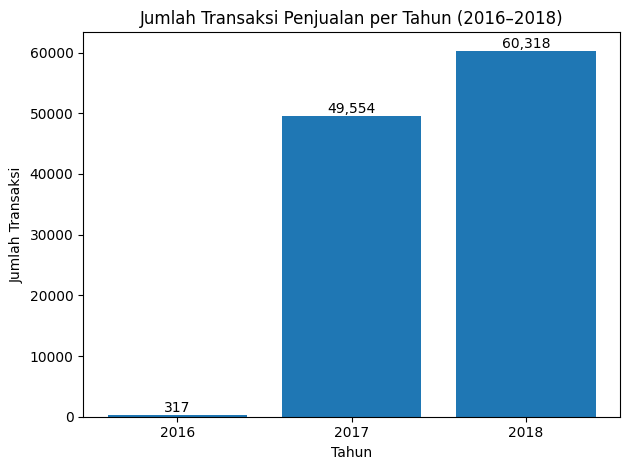

In [51]:
yearly_transactions = (
    sales_df["order_purchase_timestamp"]
    .dt.year
    .value_counts()
    .sort_index()
)

plt.figure()

bars = plt.bar(
    yearly_transactions.index.astype(str),
    yearly_transactions.values
)

plt.title("Jumlah Transaksi Penjualan per Tahun (2016–2018)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Transaksi")

# Menambahkan angka di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

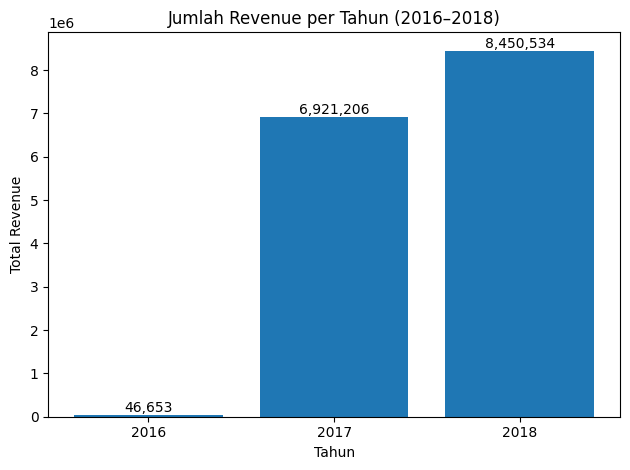

In [52]:
yearly_revenue = (
    sales_df.groupby(
        sales_df["order_purchase_timestamp"].dt.year
    )[["price", "freight_value"]]
    .sum()
    .sum(axis=1)
    .sort_index()
)

plt.figure()

bars = plt.bar(
    yearly_revenue.index.astype(str),
    yearly_revenue.values
)

plt.title("Jumlah Revenue per Tahun (2016–2018)")
plt.xlabel("Tahun")
plt.ylabel("Total Revenue")

# Menambahkan angka di atas setiap bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()

### Pertanyaan 2: Produk apa yang paling banyak terjual dan menghasilkan revenue terbesar?

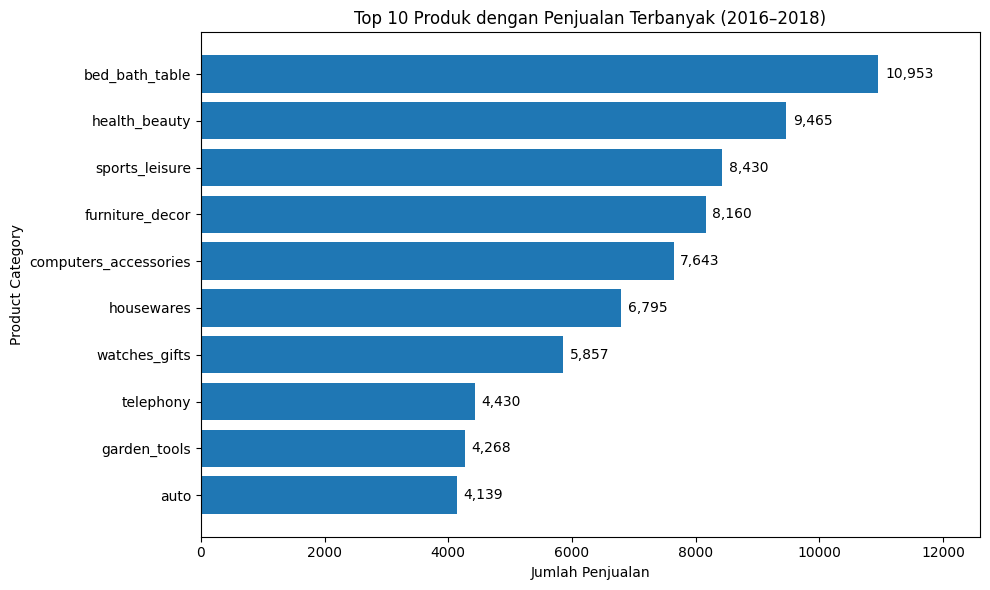

In [53]:
product_sales = (
    sales_df["product_category_name_english"]
    .value_counts()
    .head(10)
    .sort_values(ascending=True)
)

plt.figure(figsize=(10, 6))

bars = plt.barh(
    product_sales.index,
    product_sales.values
)

plt.title("Top 10 Produk dengan Penjualan Terbanyak (2016–2018)")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Product Category")

max_value = product_sales.max()
plt.xlim(0, max_value * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_value * 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va="center"
    )

plt.tight_layout()
plt.show()

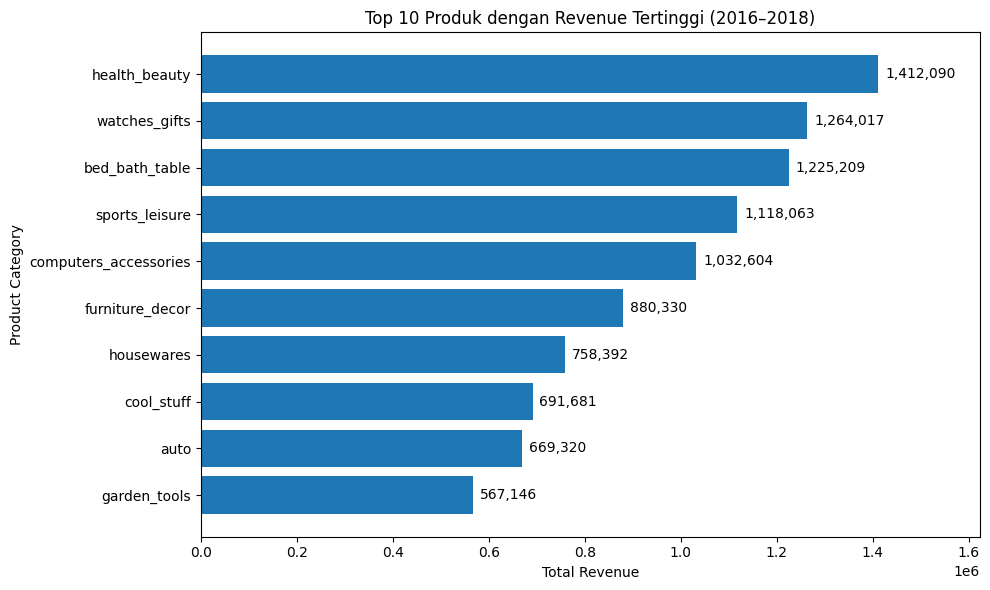

In [54]:
product_revenue = (
    sales_df.groupby("product_category_name_english")[["price", "freight_value"]]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
    .head(10)                     # ambil Top 10 revenue terbesar
    .sort_values(ascending=True)
)

plt.figure(figsize=(10, 6))

bars = plt.barh(
    product_revenue.index,
    product_revenue.values
)

plt.title("Top 10 Produk dengan Revenue Tertinggi (2016–2018)")
plt.xlabel("Total Revenue")
plt.ylabel("Product Category")

max_value = product_revenue.max()
plt.xlim(0, max_value * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_value * 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{width:,.0f}",
        va="center"
    )

plt.tight_layout()
plt.show()

### Pertanyaan 3: Daerah mana yang paling banyak tingkat penjualannya dan menghasilkan revenue terbesar?

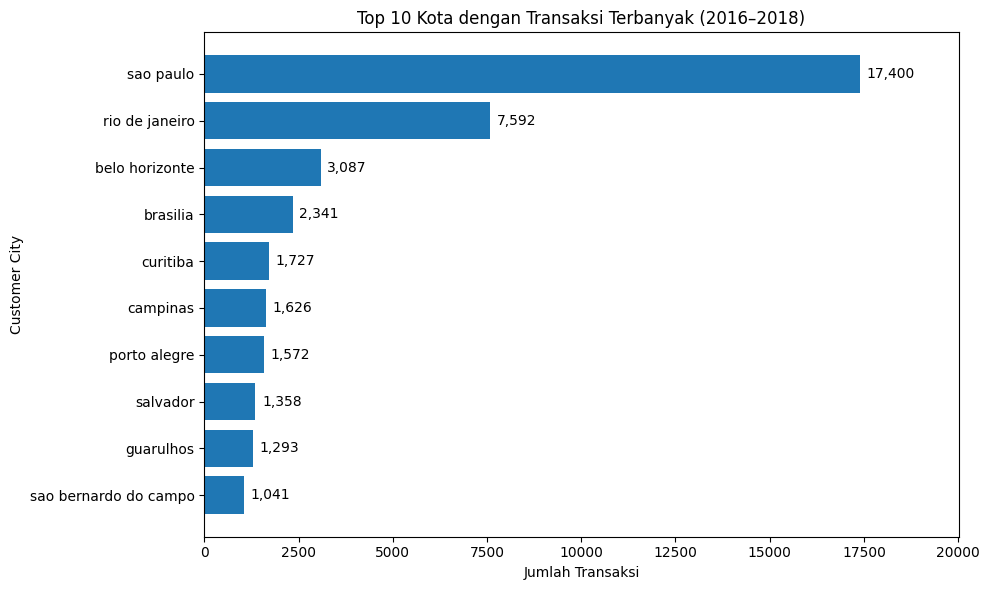

In [55]:
city_transactions = (
    sales_df["customer_city"]
    .value_counts()
    .head(10)                     # ambil Top 10 kota
    .sort_values(ascending=True)
)

plt.figure(figsize=(10, 6))

bars = plt.barh(
    city_transactions.index,
    city_transactions.values
)

plt.title("Top 10 Kota dengan Transaksi Terbanyak (2016–2018)")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Customer City")

max_value = city_transactions.max()
plt.xlim(0, max_value * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_value * 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{int(width):,}",
        va="center"
    )

plt.tight_layout()
plt.show()

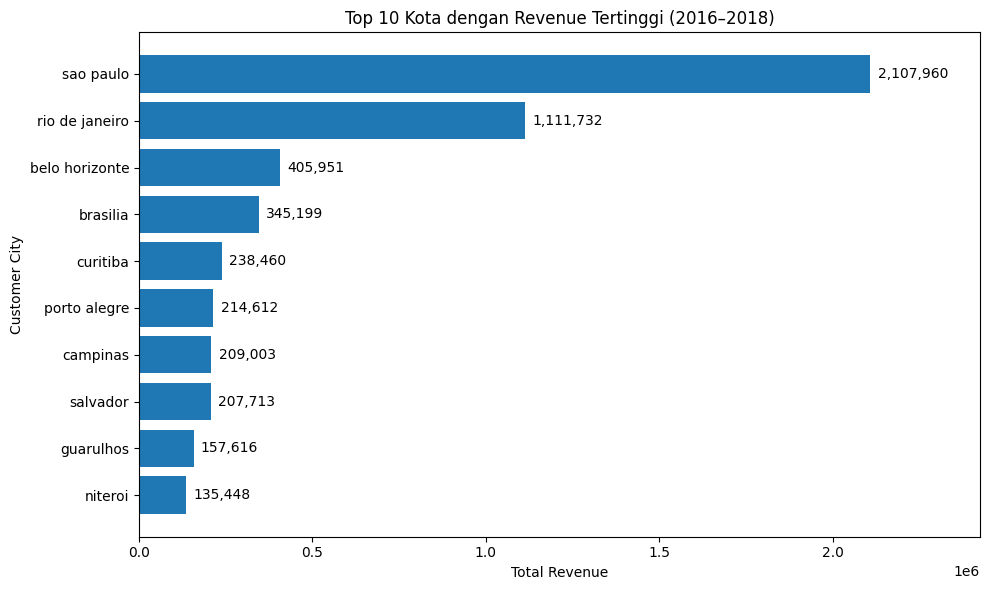

In [56]:
city_revenue = (
    sales_df.groupby("customer_city")[["price", "freight_value"]]
    .sum()
    .sum(axis=1)
    .sort_values(ascending=False)
    .head(10)                     # ambil Top 10 revenue terbesar
    .sort_values(ascending=True)
)

plt.figure(figsize=(10, 6))

bars = plt.barh(
    city_revenue.index,
    city_revenue.values
)

plt.title("Top 10 Kota dengan Revenue Tertinggi (2016–2018)")
plt.xlabel("Total Revenue")
plt.ylabel("Customer City")

max_value = city_revenue.max()
plt.xlim(0, max_value * 1.15)

for bar in bars:
    width = bar.get_width()
    plt.text(
        width + max_value * 0.01,
        bar.get_y() + bar.get_height()/2,
        f"{width:,.0f}",
        va="center"
    )

plt.tight_layout()
plt.show()

**Insight:**
1. Jumlah transaksi dan revenue menunjukkan tren peningkatan yang sangat signifikan dari tahun 2016 ke 2018.
    - Tahun 2016 memiliki transaksi sangat sedikit, yaitu 317 yang dapat disebabkan karena masih tahap awal operasional.
    - Tahun 2017 terjadi lonjakan besar menjadi 49,554 transaksi.
    - Tahun 2018 menjadi puncak dengan 60,318 transaksi.
    - Hal yang sama terlihat pada revenue, di mana tahun 2018 menghasilkan revenue tertinggi sebesar 8.45 juta, disusul 2017 sebesar 6.92 juta, dan 2016 sebesar 46.6 ribu.
2. Produk paling banyak dibeli adalah kategori bed bath table sebanyak 10.953 unit, sedangkan kategori dengan revenue tertinggi adalah health beauty sebesar 1,41 juta. Produk yang paling sering dibeli belum tentu menghasilkan revenue terbesar. Kategori health beauty kemungkinan memiliki harga rata-rata lebih tinggi dibanding bed bath table.
3. Kota dengan transaksi terbanyak adalah Sao Paulo dengan 17.400 transaksi, dan kota yang menghasilkan revenue terbesar juga Sao Paulo sebesar 2,1 juta. Dengan demikian, Sao Paulo merupakan pasar utama dan pusat kontribusi penjualan.

## Analisis Lanjutan (Opsional)

Melakukan RFM Analysis

In [57]:
# Hitung total revenue per baris
sales_df["total_revenue"] = sales_df["price"] + sales_df["freight_value"]

rfm_df = sales_df.groupby("customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",   # terakhir belanja
    "order_id": "nunique",               # jumlah transaksi
    "total_revenue": "sum"               # total pengeluaran
})

rfm_df.columns = [
    "customer_unique_id",
    "max_order_timestamp",
    "frequency",
    "monetary"
]

# Hitung Recency
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = sales_df["order_purchase_timestamp"].dt.date.max()

rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(
    lambda x: (recent_date - x).days
)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288
...,...,...,...,...
93345,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,447
93346,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,262
93347,ffff371b4d645b6ecea244b27531430a,1,112.46,568
93348,ffff5962728ec6157033ef9805bacc48,1,133.69,119


/tmp/ipython-input-54486/2028372186.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-54486/2028372186.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-54486/2028372186.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


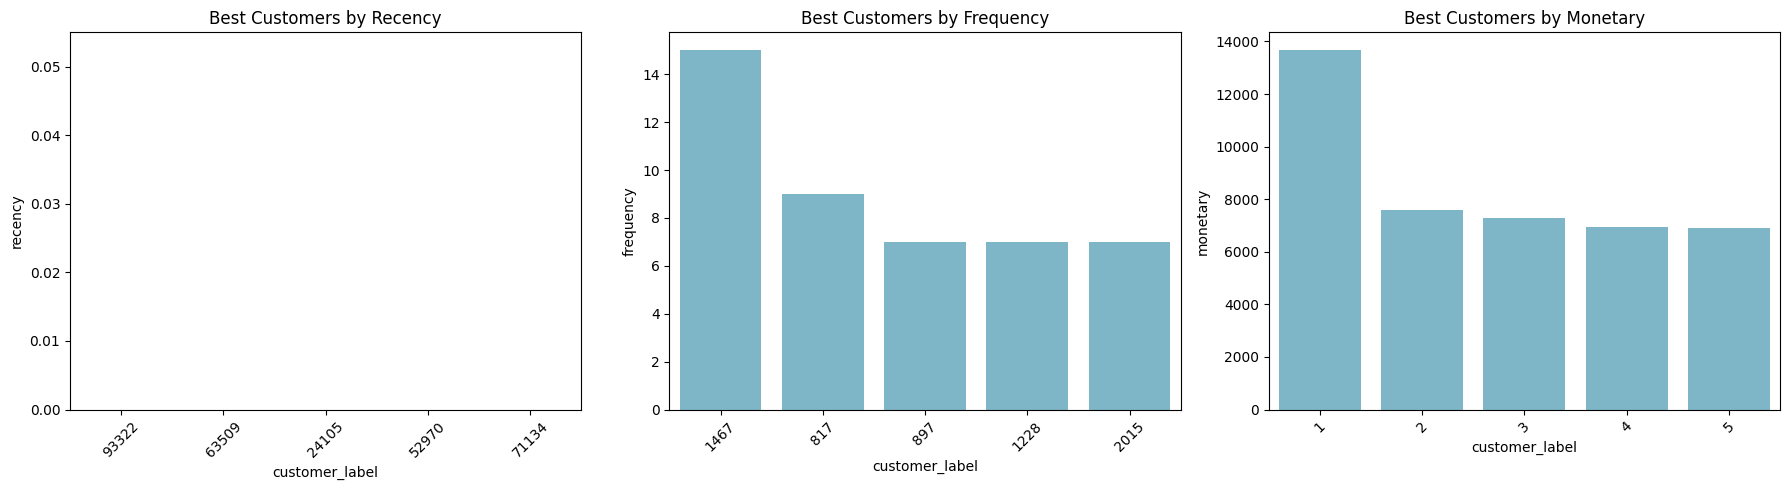

In [58]:
rfm_vis = rfm_df.copy()

# Urutkan berdasarkan monetary agar konsisten
rfm_vis = rfm_vis.sort_values(by="monetary", ascending=False).reset_index(drop=True)

rfm_vis["customer_label"] = (rfm_vis.index + 1).astype(str)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
colors = ["#72BCD4"] * 5


sns.barplot(
    y="recency",
    x="customer_label",
    data=rfm_vis.sort_values(by="recency").head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("Best Customers by Recency")
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_ylim(bottom=0)


sns.barplot(
    y="frequency",
    x="customer_label",
    data=rfm_vis.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_title("Best Customers by Frequency")
ax[1].tick_params(axis='x', rotation=45)


sns.barplot(
    y="monetary",
    x="customer_label",
    data=rfm_vis.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2]
)
ax[2].set_title("Best Customers by Monetary")
ax[2].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [59]:
rfm_df["recency"].describe()

,recency
count,93350.000000
mean,237.487156
std,152.593536
min,0.000000
25%,114.000000
50%,219.000000
75%,346.000000
max,713.000000


**Insight:**
- Berdasarkan analisis RFM, ditemukan bahwa sebagian kecil customer memiliki nilai pembelian yang tinggi dan masih aktif melakukan transaksi, sehingga termasuk dalam kategori pelanggan terbaik. Namun, secara umum frekuensi pembelian customer relatif rendah yang menunjukkan bahwa sebagian besar pelanggan hanya melakukan transaksi satu kali. Hal ini mengindikasikan bahwa tingkat retensi pelanggan masih perlu ditingkatkan melalui strategi pemasaran dan program loyalitas.

## Conclusion

1. Bisnis mengalami pertumbuhan pesat dalam dua tahun terakhir, baik dari sisi jumlah transaksi maupun pendapatan. Strategi pemasaran, ekspansi produk, atau peningkatan jumlah pelanggan kemungkinan berhasil meningkatkan performa penjualan.
2. Produk yang paling sering dibeli belum tentu menghasilkan revenue terbesar. Produk dengan volume tinggi cocok untuk strategi traffic dan promosi. Produk dengan revenue tinggi cocok untuk strategi margin dan profit.
3. Sao Paulo merupakan pasar utama dan pusat kontribusi penjualan. Dengan demikian, fokus promosi di kota tersebut dapat meningkatkan revenue lebih besar serta kota lain dapat dijadikan target ekspansi untuk meningkatkan pertumbuhan.
4. Sebagian kecil pelanggan memiliki nilai pembelian yang tinggi dan masih aktif melakukan transaksi, sehingga termasuk dalam kategori pelanggan terbaik. Namun, secara umum frekuensi pembelian pelanggan relatif rendah, yang menunjukkan bahwa sebagian besar pelanggan hanya melakukan transaksi satu kali. Hal ini mengindikasikan bahwa tingkat retensi pelanggan masih perlu ditingkatkan melalui strategi pemasaran dan program loyalitas.

Menyimpan file sales_df

In [60]:
from google.colab import files

sales_df.to_csv('sales_df.csv', index=False)